# Linear Regression

**Assumption:** Linear combination of features

$$ \mathbf{\hat{y}_{i}} = \omega_{0} + \mathbf{x}_{i}(1)\cdot\omega_{1} + \mathbf{x}_{i}(2)\cdot\omega_{2}+\cdots+\mathbf{x}_{i}(P)\cdot\omega_{P} \hspace{1cm} \forall i \in [1,N] $$

Using matricial form:

$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\omega}$$

Where:

* $\hat{y} \in \mathbb{R}^{N}$ : Estimated target.
* $\mathbf{X}\in\mathbb{R}^{N\times P}$ : Data with $N$ instances and $P$ features.
* $\mathbf{\omega}\in\mathbb{R}^{P}$: Model weigths (Weigths of features).

\\
**Optimization problem:** Least squares

Loss function:

$$ \epsilon(\omega) =  \frac{1}{2}\sum_{i}^{N}(y_{i}-\mathbf{x}_{i}\cdot\omega)^{2} = \frac{1}{2}\sum_{i}^{N}(y_{i}-\hat{y}_{i})^{2}$$
$$ \epsilon(\omega) = \frac{1}{2}\|\mathbf{e}\|_{2}^{2} \hspace{1cm} \text{being} \hspace{1cm} \mathbf{e} = \{e_{i} = y_{i}-f(\mathbf{x}_i); \forall e\in[1,N]\}$$

Problem Statement:

$$\mathbf{\omega^{*}} = \arg\min_{\mathbf{\omega}} \epsilon(\mathbf{\omega})$$

$$\mathbf{\omega^{*}} = \arg\min_{\mathbf{\omega}} \frac{1}{2}\|\mathbf{y}-\mathbf{X}\mathbf{\omega}\|_{2}^{2}$$

Solution:

$$ \frac{d\epsilon(\mathbf{\omega})}{\mathbf{\omega}} = \mathbf{y}^{\top}\mathbf{y} - 2\mathbf{y}^{\top}\mathbf{X}\mathbf{\omega} + \mathbf{\omega}^{\top}\mathbf{X}^{\top}\mathbf{X}\mathbf{\omega} = 0$$

$$\mathbf{\omega^{*}} = (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{y}$$

Where:

* $(\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}$: Pseudoinverse of $X$.
* $\mathbf{X}^{\top}\mathbf{X} \in \mathbb{R}^{P\times P}$: Linear correlation matrix (correlarion between features)

## Import libraries

In [ ]:
## Libreria convencional de aprendizaje de mquina sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1-Dimentional linear regresion

Simple linear regression

In [ ]:
###Caracteristica de los datos = 1 dimensión , nx1
#Create real X and y

N = 500 # number of points in X
x = np.linspace(-5,5,N)

# Real weigth values
w0 = -1   ###w0 es la intersección "bias"
w1 = 2    ### w1 es la pendiente

##CONCATENAR pegar más filas o más columnas
# .reshape le agrega un eje
# -1 la dimensión donde esté el-1 es la que se deja quieta
#-1 cuando no sé cuantos datos hay en esa dimensión
#También se puede dejar reshape(3,2)

X = np.c_[np.ones((N,1)),x.reshape(-1,1)] # add ones vector to include w0 (bias)
w = np.array([w0,w1]).reshape(-1,1) # create weights vector


# La multiplicación matricila es dot
y = X.dot(w) # Real target value

print('X shape: {}  y shape: {}  w shape: {}\n'.format(X.shape,y.shape,w.shape))


X shape: (500, 2)  y shape: (500, 1)  w shape: (2, 1)



Real weigths: [-1  2]
Predicted weigths: [-1.  2.]



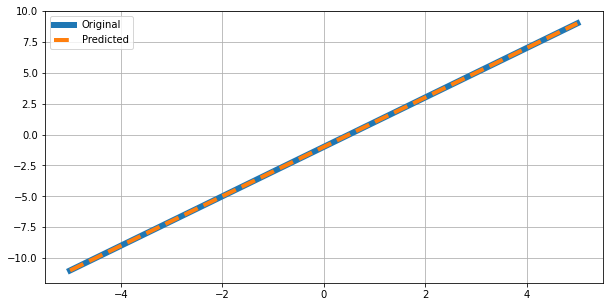

In [ ]:
#Estimate y via less squares
# pseudo inversa es : pinv
w_pred = np.linalg.pinv(X).dot(y) #es la estimación de w, w optim, el predicho
y_pred = X.dot(w_pred)

print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(w_pred.ravel()))


# Plot data

plt.figure(figsize=(10,5)) #10 es ancho
plt.plot(X[:,1],y, label = 'Original', linewidth= 6)
plt.plot(X[:,1],y_pred,'--', label = 'Predicted', linewidth = 4)
plt.grid(True) ### cuadricuka
plt.legend()  #level en la gráfica
plt.show()

In a machine learning point of view, we add noise to $y$ to simulate real data values (i.e., from any sensor)

In [ ]:
# Simulate real life data
# Ruido con distribución gausiana
var = 2
noise = np.sqrt(var)*np.random.randn(N) # adding gaussian noise
yn = y + noise.reshape(-1,1)

print('X shape: {}  yn shape: {}  w shape: {}\n'.format(X.shape,yn.shape,w.shape))


X shape: (500, 2)  yn shape: (500, 1)  w shape: (2, 1)



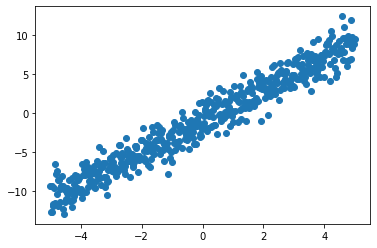

In [ ]:
plt.figure()
plt.scatter(X[:,1],yn)
plt.show()

Real weigths: [-1  2]
Predicted weigths: [-0.93588343  2.00220114]



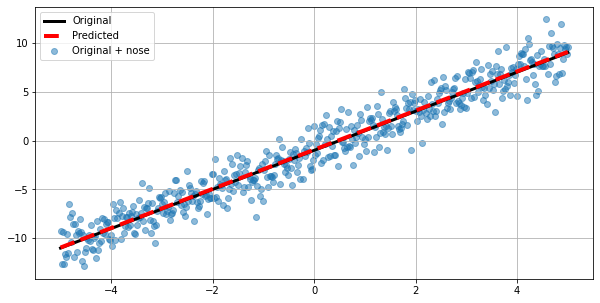

In [ ]:

#Estimate y via less squares

w_pred = np.linalg.pinv(X).dot(yn)
y_pred = X.dot(w_pred)

print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(w_pred.ravel()))


# Plot data

plt.figure(figsize=(10,5))
plt.plot(X[:,1],y,'k', label = 'Original', linewidth= 3)
plt.scatter(X[:,1],yn, label = 'Original + nose', alpha=0.5)
plt.plot(X[:,1],y_pred,'r--', label = 'Predicted', linewidth = 4)
plt.grid(True)
plt.legend()
plt.show()


Regresión es mirar caracteristicas

## P-Dimentional linear regression

Multiple linear regression

X shape: (500, 6)  y shape: (500, 1)  w shape: (6, 1)

Real weigths: [ 0 -1 -1  1 -1 -2]
Predicted weigths: [ 4.16333634e-17 -1.00000000e+00 -1.00000000e+00  1.00000000e+00
 -1.00000000e+00 -2.00000000e+00]



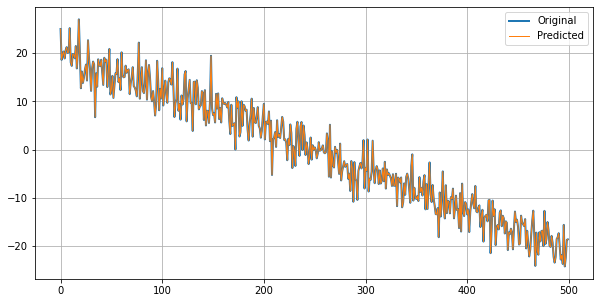

In [ ]:
#Create real X and y

N = 500 # number of samples in X

x = np.linspace(-5,5,N)

P = 5

for i in range(P):
    if i == 0:
        X = x.reshape(-1,1)
    else:
        var_x = np.abs(np.random.randn(1))  ## varianza aleatoria
        noise_x = np.sqrt(var_x)*np.random.randn(N,1)
        X = np.concatenate([X,x.reshape(-1,1)+noise_x],axis=-1)

X = np.c_[np.ones((N,1)),X] # add ones vector to include w0 (bias)

noise = np.sqrt(var_x)*np.random.randn(N) # adding gaussian noise
yn = y + noise.reshape(-1,1)

# Real weigth values

w = w = np.random.randint(-2,2,P+1).reshape(-1,1) # create weights vector
yn = X.dot(w) # Real target value

print('X shape: {}  y shape: {}  w shape: {}\n'.format(X.shape,y.shape,w.shape))

#Estimate y via less squares

w_pred = np.linalg.pinv(X).dot(yn)  # W estimado
y_pred = X.dot(w_pred)             # Y estimado

print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(w_pred.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(yn, label = 'Original', linewidth= 2) #eje cada una de las muestras , # eje y es el target
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()


**Exercise:** complete the next code to make a linear regression with $P$ features adding noise to $y$

In [ ]:
#Create real X and y

N = 500 # number of samples in X

x = np.linspace(-5,5,N)

P = 5

for i in range(P):
    if i == 0:
        X = x.reshape(-1,1)
    else:
        var_x = np.abs(np.random.randn(1))  ## varianza aleatoria
        noise_x = np.sqrt(var_x)*np.random.randn(N,1)
        X = np.concatenate([X,x.reshape(-1,1)+noise_x],axis=-1)

X = np.c_[np.ones((N,1)),X] # add ones vector to include w0 (bias)

# Real weigth values

w = w = np.random.randint(-2,2,P+1).reshape(-1,1) # create weights vector
y = X.dot(w) # Real target value

print('X shape: {}  y shape: {}  w shape: {}\n'.format(X.shape,y.shape,w.shape))

#Estimate y via less squares

w_pred = np.linalg.pinv(X).dot(y)  # W estimado
y_pred = X.dot(w_pred)             # Y estimado

print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(w_pred.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original', linewidth= 2)
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()


**Using Sklearn:** sklearn use classes for make the models with attributes like *fit()* and *predict()*

# sklearn objetos de modelos
Crear modelos

Real weigths: [ 1  1 -1  1 -2  1]
Predicted weigths: [ 1. -1.  1. -2.  1.]



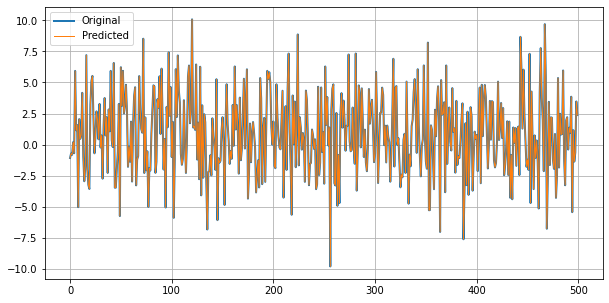

In [ ]:
#Transform cuando no se tiene modelos supervisados
# fit entrena o ajusta
#ajustar los parametros a las etiquetas, encontrar el w
#Predicción cuando se hace la multiplicación de x por el w encontrado


mdl = LinearRegression() # create model as object
mdl.fit(X[:,1::],y) # fit the model to X data (trainin stage). Sklearn don't need the bias.
#predict solo sirve si antes se usa el fit
y_pred = mdl.predict(X[:,1::]) # predict target (inference stage)

# ravel alargar una matriz o un vector
#la primera fila le concatena la segunda
print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(mdl.coef_.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original', linewidth= 2)
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()

# Regularization

## L2-regulatization: Ridge regression

Para que los valores propios no sean cercanos a 0
# lambda es valor de lagrange
Regularización

Optimization problem:

$$\mathbf{\omega^{*}} = \arg\min_{\mathbf{\omega}} \frac{1}{2}\|\mathbf{y}-\mathbf{X}\mathbf{\omega}\|_{2}^{2} + \frac{1}{2}\lambda\|\mathbf{\omega}\|_{2}^{2}$$

Solution:

$$ \frac{d\epsilon(\mathbf{\omega})}{\mathbf{\omega}} = -\mathbf{X}^{\top}\mathbf{y} - \mathbf{X}^{\top}\mathbf{X}\mathbf{\omega} + \lambda\mathbf{\omega} = 0$$

$$\mathbf{\omega^{*}} = (\mathbf{X}^{\top}\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^{\top}\mathbf{y}$$

**Exercise:** write a code to make Ridge regression with the above data

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
mdl = Ridge(,alpha=0.5) # create model as object
mdl.fit(X[:,1::],y) # fit the model to X data (trainin stage). Sklearn don't need the bias.
#predict solo sirve si antes se usa el fit
y_pred = mdl.predict(X[:,1::]) # predict target (inference stage)

# ravel alargar una matriz o un vector
#la primera fila le concatena la segunda
print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(mdl.coef_.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original', linewidth= 2)
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()

## L1-regularization: LASSO regression

Optimization problem:

$$\mathbf{\omega^{*}} = \arg\min_{\mathbf{\omega}} \frac{1}{2}\|\mathbf{y}-\mathbf{X}\mathbf{\omega}\|_{2}^{2} + \lambda\|\mathbf{\omega}\|_{1}^{1}$$

**Exercise:** find the analitical solution of LASSO:

**Complete the solution:**

Solution:




#

**Exercise:** write a code to make Lasso regression with the above data

In [ ]:
from sklearn.linear_model import Lasso

Real weigths: [ 0 -1 -1  1 -1 -2]
Predicted weigths: [-1.80972777 -0.03245524 -0.         -0.03171512 -0.04942343]



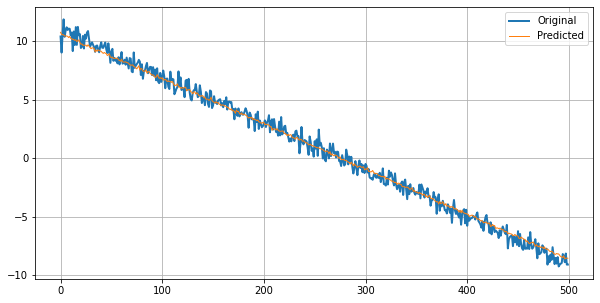

In [ ]:

mdl = Lasso(alpha=0.5) # create model as object
mdl.fit(X[:,1::],y) # fit the model to X data (trainin stage). Sklearn don't need the bias.
#predict solo sirve si antes se usa el fit
y_pred = mdl.predict(X[:,1::]) # predict target (inference stage)

# ravel alargar una matriz o un vector
#la primera fila le concatena la segunda
print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(mdl.coef_.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original', linewidth= 2)
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()

## L1 & L2 regularization: Elasticnet

Optimization problem:

$$\mathbf{\omega^{*}} = \arg\min_{\mathbf{\omega}} \frac{1}{2}\|\mathbf{y}-\mathbf{X}\mathbf{\omega}\|_{2}^{2} + \lambda_{1}\|\mathbf{\omega}\|_{1}^{1} + \frac{1}{2}\lambda_{2}\|\mathbf{\omega}\|_{2}^{2}$$

**Exercise:** find the analitical solution of Elasticnet:

**Complete the solution:**

Solution:




#

**Exercise:** write a code to make Elasticnet with the above data

In [ ]:
from sklearn.linear_model import ElasticNet

Real weigths: [ 0 -1 -1  1 -1 -2]
Predicted weigths: [-0.98856374 -0.4394518  -0.24809327 -0.10599756 -0.14963881]



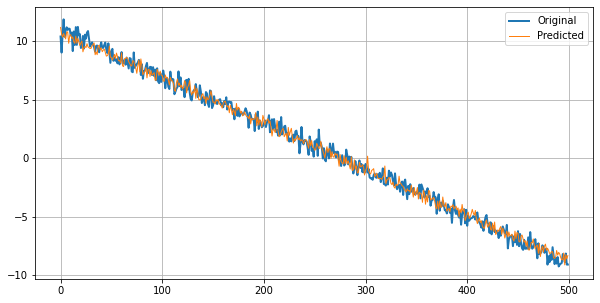

In [ ]:
# alpha es para el Ridge
# Alpha y l1_ratio son hiperparámetros
mdl = ElasticNet(alpha=0.3,l1_ratio=0.5) # create model as object
mdl.fit(X[:,1::],y) # fit the model to X data (trainin stage). Sklearn don't need the bias.
#predict solo sirve si antes se usa el fit
y_pred = mdl.predict(X[:,1::]) # predict target (inference stage)

# ravel alargar una matriz o un vector
#la primera fila le concatena la segunda
print('Real weigths: {}'.format(w.ravel()))
print('Predicted weigths: {}\n'.format(mdl.coef_.ravel()))

# Plot data

plt.figure(figsize=(10,5))
plt.plot(y, label = 'Original', linewidth= 2)
plt.plot(y_pred, label = 'Predicted', linewidth = 1)
plt.grid(True)
plt.legend()
plt.show()